In [1]:
import numpy as np
import pandas as pd


import nltk
from nltk.probability import FreqDist

## Reading an Displaying Dataframe
***

In [2]:
data = pd.read_csv(r"C:\Users\coloR_\Desktop\tripadvisor_hotel_reviews.csv")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_colwidth", None)
data.head(2)

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2


In [3]:
import string
string.punctuation
pd.options.mode.chained_assignment = None

## Expanding Contractions 
***
Here we take word such as *it's*, *don't* and convert it to its base form 
which are -  **it is**, **do not** respectively

In [4]:
#pip install py contractions

In [5]:
import contractions
data['text_with_no_contract'] = data['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
data['Reviews'] = [' '.join(map(str, l)) for l in data['text_with_no_contract']]
data.head(2)

,Review,Rating,text_with_no_contract,Reviews
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary,, arrived, late, evening, took, advice, previous, reviews, did, valet, parking,, check, quick, easy,, little, disappointed, non-existent, view, room, room, clean, nice, size,, bed, comfortable, woke, stiff, neck, high, pillows,, not, soundproof, like, heard, music, room, night, morning, loud, bangs, doors, opening, closing, hear, people, talking, hallway,, maybe, just, noisy, neighbors,, aveda, bath, products, nice,, did, not, goldfish, stay, nice, touch, taken, advantage, staying, longer,, location, great, walking, distance, shopping,, overall, nice, experience, having, pay, 40, parking, night,]","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle,, start, booked, suite, paid, extra, website, description, not,, suite, bedroom, bathroom, standard, hotel, room,, took, printed, reservation, desk, showed, said, things, like, tv, couch, ect, desk, clerk, told, oh, mixed, suites, description, kimpton, website, sorry, free, breakf

In [6]:
data.columns

Index(['Review', 'Rating', 'text_with_no_contract', 'Reviews'], dtype='object')

In [7]:
data.drop(['Review', 'text_with_no_contract'],axis= 1,inplace = True)

In [8]:
pd.set_option("display.max_colwidth", None)
data

Rating  \
0           4   
1           2   
2           3   
3           5   
4           5   
...       ...   
20486       5   
20487       4   
20488       2   
20489       1   
20490       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

***
## Describing Reviews in a bar plot

Text(0.5, 1.0, 'Quantity of Reviews per ratings')

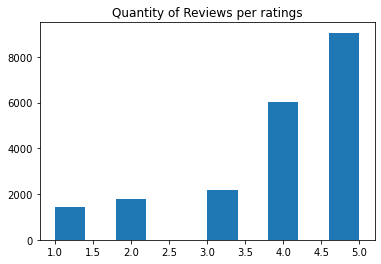

In [9]:
import matplotlib.pyplot as plt
data['Rating'].hist(bins=10, grid=False)
plt.title('Quantity of Reviews per ratings')

### Here we can see the distribution of reviews per rating.

In [10]:
data = data["Reviews"]
test_data = data.head(500)
test_data[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

## Performing lemmatization 
***
Performing lemmatization to remove words similar to each other.
Lemmatization converts words such as *rooms,staffs* to their base form which is **room** and **staff** respectively

In [11]:
from nltk.stem import WordNetLemmatizer
wm = WordNetLemmatizer()
import re
lemm = []
for i in range(0,len(test_data)):
    review = re.sub("\.\.+", ". ", test_data[i])
    review = review.lower()
    words_list = [wm.lemmatize(word) for word in review.split()]
    review = " ".join(words_list)
    lemm.append(review)

lemm[0]


'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

## Tagging

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
reviews = []
for i in lemm:
    tagged = nlp(i)
    for x in tagged.sents:
        reviews.append((str(x)))

reviews[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

In [13]:
reviews1 = []
for x in reviews:
    text = x.split(", ")
    for i in text:
        reviews1.append(i)

reviews_tagged = []
for x in reviews1:
    tagged = nlp(x)
    reviews_tagged.append(tagged)

reviews_tagged[0]


nice hotel expensive parking got good deal stay hotel anniversary

## Performing VADER Sentiment analysis on reviews -
***
This categorises our reviews as postive, negative and neutral

In [14]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments = []
sia = SentimentIntensityAnalyzer()
for i,x in enumerate(reviews_tagged):
    polarity_dict = sia.polarity_scores(str(x))

    if polarity_dict["compound"] == 0:
        sentiments.append([str(x), [token.text for token in x if token.pos_ == "NOUN" and (token.dep_ == "nsubj" or token.dep_ == "ROOT")], "Neutral"])

    elif polarity_dict["compound"] > 0:
        sentiments.append([str(x),[token.text for token in x if token.pos_ == "NOUN" and (token.dep_ == "nsubj" or token.dep_ == "ROOT")],"Positive"])

    else:
        sentiments.append([str(x),[token.text for token in x if token.pos_ == "NOUN" and (token.dep_ == "nsubj" or token.dep_ == "ROOT")],"Negative"])

sentiments[0]


['nice hotel expensive parking got good deal stay hotel anniversary',
 ['parking', 'deal'],
 'Positive']

In [15]:
data = pd.DataFrame(sentiments, columns = ["Text", "Aspect", "Sentiment"])

In [16]:
data

,Text,Aspect,Sentiment
0,nice hotel expensive parking got good deal stay hotel anniversary,"[parking, deal]",Positive
1,arrived late evening took advice previous review did valet parking,[],Neutral
2,check quick easy,[],Positive
3,little disappointed non-existent view room room clean nice size,[room],Positive
4,bed comfortable woke stiff neck high pillows,[bed],Positive
...,...,...,...
5268,"feather product housekeeping staff prompt bringing replacement feather bed.good room coffee,",[prompt],Neutral
5269,outstanding luxurious accommodation including huge room extraordinarily comfortable mattress pillows,[accommodation],Positive
5270,bathroom incredible jacuzzi tub seperate shower 2 vanity plush robe granite marble,[shower],Negative
5271,great location flying seattle plan visiting mt,[location],Positive


## Dropping rows with empty list
***

In [17]:
index = []
for i in range(len(data)):
    if data["Aspect"][i] == []:
        index.append(i)

data = data.drop(index, axis = 0)
data.head(10)


,Text,Aspect,Sentiment
0,nice hotel expensive parking got good deal stay hotel anniversary,"[parking, deal]",Positive
3,little disappointed non-existent view room room clean nice size,[room],Positive
4,bed comfortable woke stiff neck high pillows,[bed],Positive
5,not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway,[people],Negative
6,maybe just noisy neighbors,[neighbors],Negative
7,aveda bath product nice,[product],Positive
9,location great walking distance shopping,[shopping],Positive
10,"overall nice experience having pay 40 parking night,",[experience],Positive
11,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle,[chain],Negative
12,start booked suite paid extra website description not,[suite],Neutral


## Assigning numeric values 
***
Assigning numeric values to sentiment so after finding each aspect we can calculate thier rating sum

In [18]:
def sentiment_score(row):
    if row["Sentiment"] == "Positive":
        return 5
    elif row["Sentiment"] == "Neutral":
        return 3
    elif row["Sentiment"] == "Negative":
        return 1
data["Score"] = data.apply(sentiment_score, axis = 1)
data

,Text,Aspect,Sentiment,Score
0,nice hotel expensive parking got good deal stay hotel anniversary,"[parking, deal]",Positive,5
3,little disappointed non-existent view room room clean nice size,[room],Positive,5
4,bed comfortable woke stiff neck high pillows,[bed],Positive,5
5,not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway,[people],Negative,1
6,maybe just noisy neighbors,[neighbors],Negative,1
...,...,...,...,...
5267,excellent rate 2 people 2 beds.free shuttle rental car drop location.decent wireless internet access.all staff extremely helpful desk housekeeping shuttle driver bell person.front desk let use printer print business doc free 9pm.prompt free shuttle early flight.quiet odor free room,"[desk, room]",Positive,5
5268,"feather product housekeeping staff prompt bringing replacement feather bed.good room coffee,",[prompt],Neutral,3
5269,outstanding luxurious accommodation including huge room extraordinarily comfortable mattress pillows,[accommodation],Positive,5
5270,bathroom incredible jacuzzi tub seperate shower 2 vanity plush robe granite marble,[shower],Negative,1


## Total aspects
***

In [19]:
aspect_to_list = []
for data_aspect_to_list in data["Aspect"]:
    for i in data_aspect_to_list:
        aspect_to_list.append(i)
from nltk.probability import FreqDist
freq_counter = FreqDist()
for i in aspect_to_list:
    freq_counter[i] += 1

all_aspects = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
all_aspects = all_aspects.sort_values(by = "Count", ascending = False)
all_aspects

,Count
room,283
hotel,260
staff,160
location,84
place,66
...,...
prize,1
cafeteria,1
boy,1
inns,1


## Maximum Aspect Rating Sum
***

In [20]:
aspects_unique = all_aspects.index.to_list()
total_aspects = []
for x in aspects_unique:
    rating_sum = 0
    for i in range(len(data)):
        for j in data["Aspect"].iloc[i]:
            if j == x:
                rating_sum += data["Score"].iloc[i]
 
    total_aspects.append(rating_sum)
total_aspects[0]



1069

## Assigning Rating to each aspect base on rating sum
***

In [21]:
all_aspects["Rating_Sum"] = total_aspects
all_aspects["Rating"] = round((all_aspects["Rating_Sum"]/all_aspects["Count"]),1)
all_aspects.to_csv("aspect_ratings.csv")
all_aspects

,Count,Rating_Sum,Rating
room,283,1069,3.8
hotel,260,1052,4.0
staff,160,690,4.3
location,84,390,4.6
place,66,260,3.9
...,...,...,...
prize,1,5,5.0
cafeteria,1,5,5.0
boy,1,5,5.0
inns,1,1,1.0


## Making Wordcloud
***

In [22]:
# pip install wordcloud

In [23]:
data_pos = all_aspects[all_aspects["Rating"]>3]
data_neu = all_aspects[all_aspects["Rating"]==3]
data_neg = all_aspects[all_aspects["Rating"]<3]
pos_list = []
neg_list = []
neu_list = []
for i,j in enumerate(data_pos["Count"]):
    for x in range(j):
        pos_list.append(data_pos.index[i])
        
for i,j in enumerate(data_neu["Count"]):
    for x in range(j):
        neu_list.append(data_neu.index[i])
        
for i,j in enumerate(data_neg["Count"]):
    for x in range(j):
        neg_list.append(data_neg.index[i])

data_pos = " ".join(pos_list)
data_neg = " ".join(neg_list)
data_neu = " ". join(neu_list)

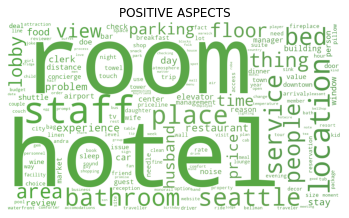

In [24]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
green_mask = np.array(Image.open("img.jfif"))
green_color = ImageColorGenerator(green_mask)
wc1 = WordCloud(mask = green_mask, color_func = green_color, background_color = "white", collocations = False).generate(data_pos)
plt.imshow(wc1)
plt.title("POSITIVE ASPECTS")
plt.axis("off")
plt.show()


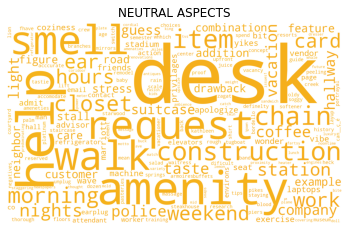

In [25]:
ochre_mask = np.array(Image.open("img1.jpg"))
ochre_color = ImageColorGenerator(ochre_mask)
wc2 = WordCloud(mask = ochre_mask, color_func = ochre_color, background_color = "white", collocations = False).generate(data_neu)
plt.imshow(wc2)
plt.title("NEUTRAL ASPECTS")
plt.axis("off")
plt.show()


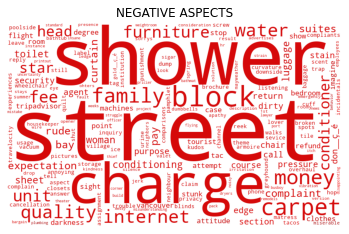

In [26]:
red_mask = np.array(Image.open("img2.jpg"))
red_color = ImageColorGenerator(red_mask)
wc3 = WordCloud(mask = red_mask, color_func = red_color, background_color = "white", collocations = False).generate(data_neg)
plt.imshow(wc3)
plt.title("NEGATIVE ASPECTS")
plt.axis("off")
plt.show()